### Comapring Clustering Algorithms and learn how to optimize DBScan using KNN

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import plotly_express as px

In [48]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder , MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

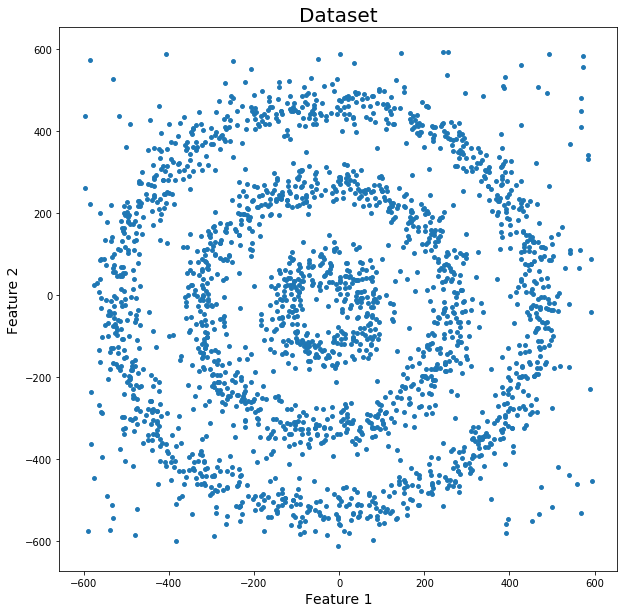

In [49]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
             math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15)
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Kmeans Clustering

0.3548143194479552


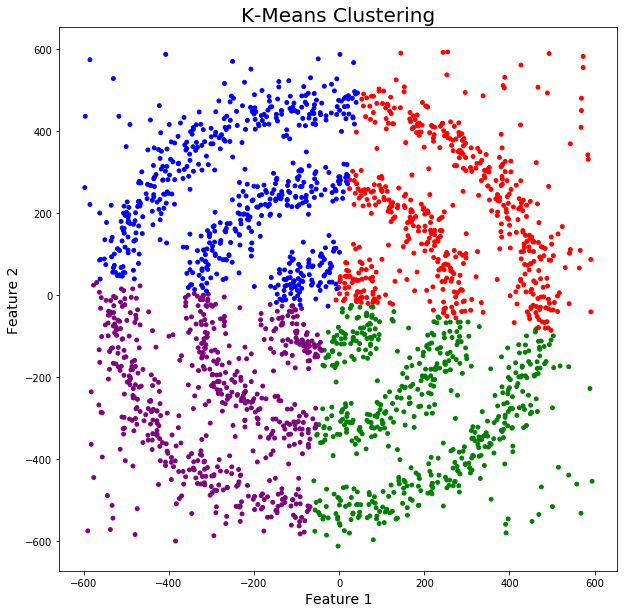

In [50]:

df.columns=['one','two']
kmeans=KMeans(n_clusters=4, n_init=10,max_iter=400).fit(df)

DF=df.copy()

DF['KM_lable']=kmeans.predict(df)

print(silhouette_score(df,kmeans.predict(df)))

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.KM_lable, cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Gaussian Mixture

Silhoete Score: 0.36480930132520667
AIC Score: 64970.49082913605


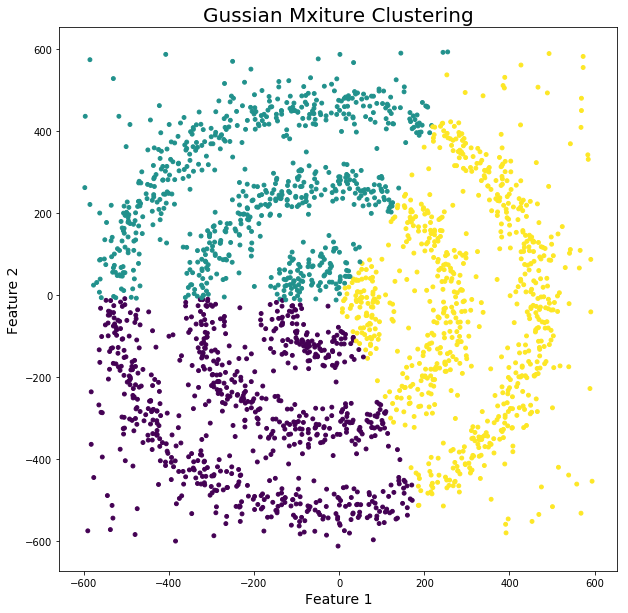

In [51]:
GM=GaussianMixture(n_components=3,max_iter=500, n_init=20).fit(df)


DF['GM_lable']=GM.predict(df)

print('Silhoete Score:',silhouette_score(df,GM.predict(df)))
print('AIC Score:',GM.aic(df))
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.GM_lable,s=15)
plt.title('Gussian Mxiture Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Silhouette Score 0.35419076443255454


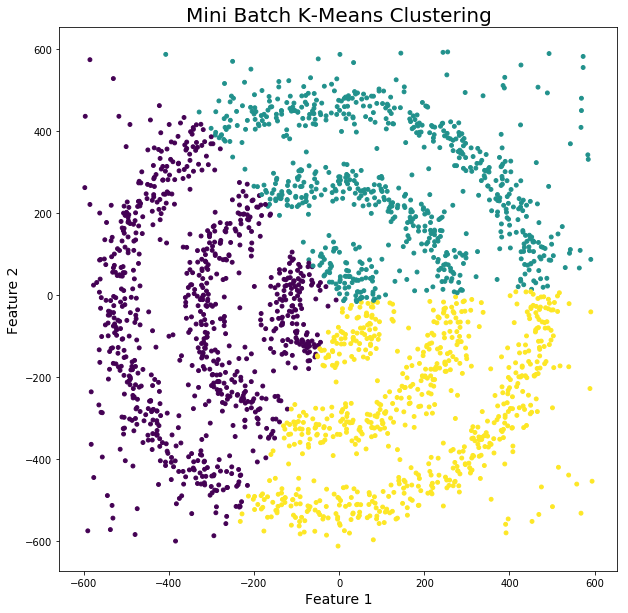

In [70]:
miniKM=MiniBatchKMeans(n_clusters=3 ,batch_size=3, n_init=40).fit(df)

lables=miniKM.predict(df)

DF['MK_lable']=lables


score = silhouette_score(df,lables)
print ("Silhouette Score", score)



plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.MK_lable, s=15)
plt.title('Mini Batch K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


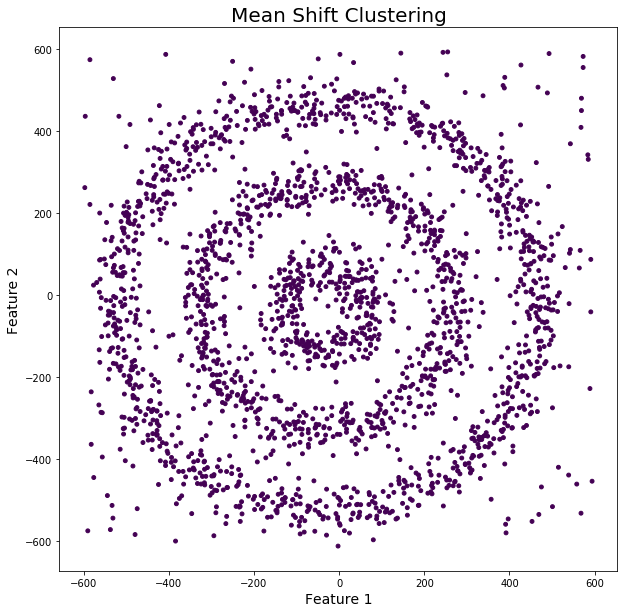

In [75]:
from sklearn.cluster import MeanShift

meanshift=MeanShift(cluster_all=False,min_bin_freq=3  ).fit(df)

lables=meanshift.predict(df)

DF['MeanSH_lable']=lables


#score = silhouette_score(df,lables)
#print ("Silhouette Score", score)



plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.MeanSH_lable, s=15)
plt.title('Mean Shift Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Silhouette Score 0.31874466079924324


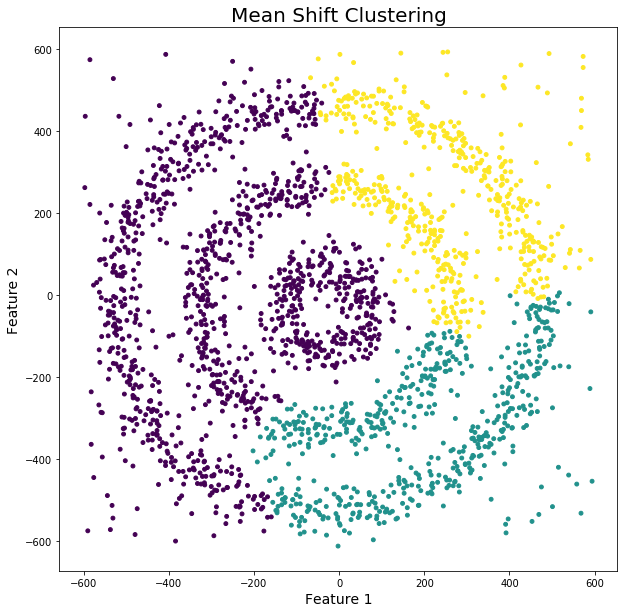

In [81]:
linkage_style= ['complete', 'average', 'ward']


"""
- ward minimizes the variance of the clusters being merged.
    - average uses the average of the distances of each observation of
      the two sets.
    - complete or maximum linkage uses the maximum distances between
      all observations of the two sets.
    - single uses the minimum of the distances between all observations
      of the two sets.
"""

Hierarchy=AgglomerativeClustering(n_clusters=3, linkage=linkage_style[2], affinity='euclidean')

lables=Hierarchy.fit_predict(df)

DF['Agglo_lable']=lables


score = silhouette_score(df,lables)
print ("Silhouette Score", score)



plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.Agglo_lable, s=15)
plt.title('Mean Shift Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## DBSCAN

1


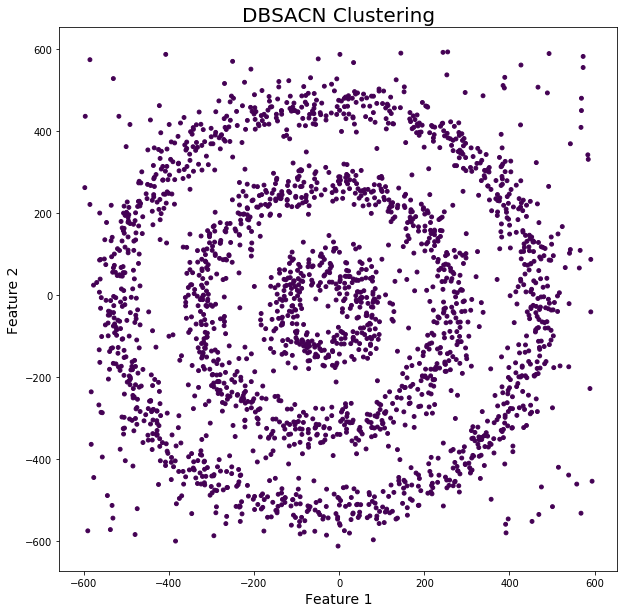

In [84]:
DB=DBSCAN( eps=0.2, min_samples=4)
DB.fit(df)

print(len(set(DB.labels_)))

DF['DB_lable']=DB.labels_

#score = silhouette_score(df,DB.labels_)
#print ("Silhouette Score", score)

colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.DB_lable,s=15)
plt.title('DBSACN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### No Cluster Treated all points as outlier

- we need to find the value for eps and min sample

* For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighb

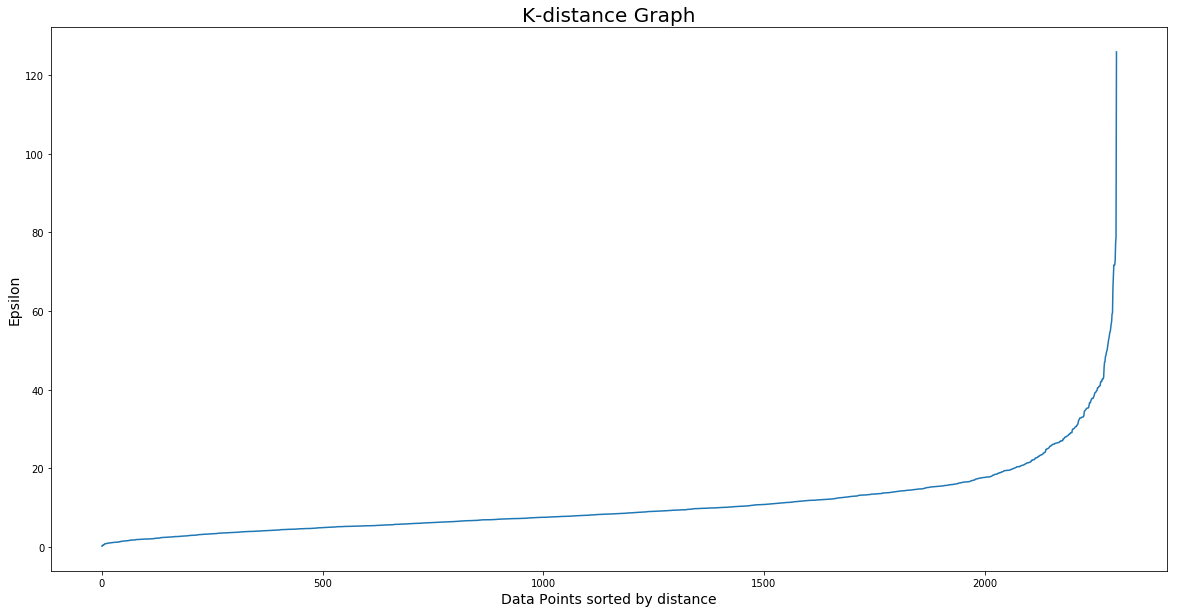

In [97]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### the optimal value for eps is 40 as show how many datapoints by distance in above chart and min sample depends on domain knowledge we use 6

 0    1101
 1     766
 2     327
-1     106
Name: DB_opt_label, dtype: int64


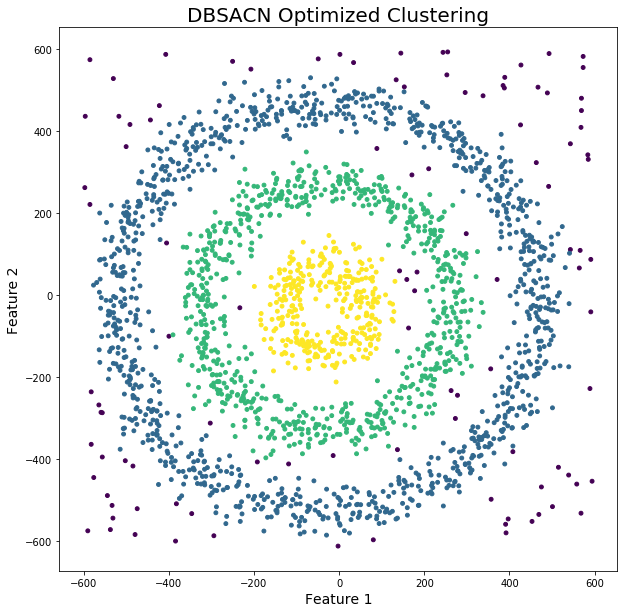

In [108]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=40,min_samples=6)
dbscan_opt.fit(df)

DF['DB_opt_label']=dbscan_opt.labels_
print(DF['DB_opt_label'].value_counts())

plt.figure(figsize=(10,10))
plt.scatter(df['one'],df['two'],c=DF.DB_opt_label,s=15)
plt.title('DBSACN Optimized Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()